<a href="https://colab.research.google.com/github/rushikeshburle/Machine-Learning-Algorithms-and-method/blob/main/DSML_Mar_Apr24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Missing Values**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TheTitanic.csv', na_values=['**','?'], skiprows=1)

In [ ]:
df

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0.0,7.5500,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42.0,0.0,7.5500,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,NaN,2.0,20.2500,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,NaN,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2.0,20.2500,S,04-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0.0,13.0000,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1.0,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,7.2250,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0.0,7.2250,C,22-Jul-93


In [ ]:
df.isna().sum()

sn              0
pclass          0
survived        0
Unnamed: 3      0
gender          1
age           258
family          2
fare            3
embarked        6
date            0
dtype: int64

In [ ]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [ ]:
df['embarked'].fillna(df['embarked'].mode(), inplace=True)

In [ ]:
df.isna().sum()

sn              0
pclass          0
survived        0
Unnamed: 3      0
gender          1
age           258
family          2
fare            3
embarked        5
date            0
dtype: int64

In [ ]:
# dropna
df.dropna(inplace=True)

In [ ]:
# fillna
df['age'].mean()

29.927986512524086

In [ ]:
df['age'].fillna(df['age'].mean() )

0       42.0
4       35.0
5       16.0
6       25.0
7       30.0
        ... 
1296    24.0
1297    14.5
1298    26.5
1299    27.0
1300    29.0
Name: age, Length: 1038, dtype: float64

In [ ]:
df['fare'].median()

15.74585

In [ ]:
df['age'].interpolate()

0       42.0
4       35.0
5       16.0
6       25.0
7       30.0
        ... 
1296    24.0
1297    14.5
1298    26.5
1299    27.0
1300    29.0
Name: age, Length: 1038, dtype: float64

In [ ]:
df['gender'].mode()

0    male
Name: gender, dtype: object

In [ ]:
df['gender']

0         male
4       female
5       female
6         male
7         male
         ...  
1296    female
1297    female
1298      male
1299      male
1300      male
Name: gender, Length: 1038, dtype: object

In [ ]:
df['gender'].bfill()

0         male
4       female
5       female
6         male
7         male
         ...  
1296    female
1297    female
1298      male
1299      male
1300      male
Name: gender, Length: 1038, dtype: object

In [ ]:
# simple imputer
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='constant',fill_value=0 )

In [ ]:
df[['age','fare']] = si.fit_transform(df[['age','fare']])

In [ ]:
df[['age','fare']]

,age,fare
0,42.0,7.5500
4,35.0,20.2500
5,16.0,7.6500
6,25.0,7.6500
7,30.0,24.0000
...,...,...
1296,24.0,13.0000
1297,14.5,14.4542
1298,26.5,7.2250
1299,27.0,7.2250


In [ ]:
# knn imputer
from sklearn.impute import KNNImputer
knni = KNNImputer()

In [ ]:
df[['family1']] = knni.fit_transform(df[['family']])

In [ ]:
df

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date,family1
0,1,3,0,Mr. Anthony,male,42.0,0.0,7.5500,S,01-Jan-90,0.0
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2.0,20.2500,S,04-Jan-90,2.0
5,5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0.0,7.6500,S,05-Jan-90,0.0
6,6,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0.0,7.6500,S,06-Jan-90,0.0
7,7,2,0,"Abelson, Mr. Samuel",male,30.0,1.0,24.0000,C,07-Jan-90,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0.0,13.0000,S,19-Jul-93,0.0
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1.0,14.4542,C,20-Jul-93,1.0
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,7.2250,C,21-Jul-93,0.0
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0.0,7.2250,C,22-Jul-93,0.0


<Axes: >

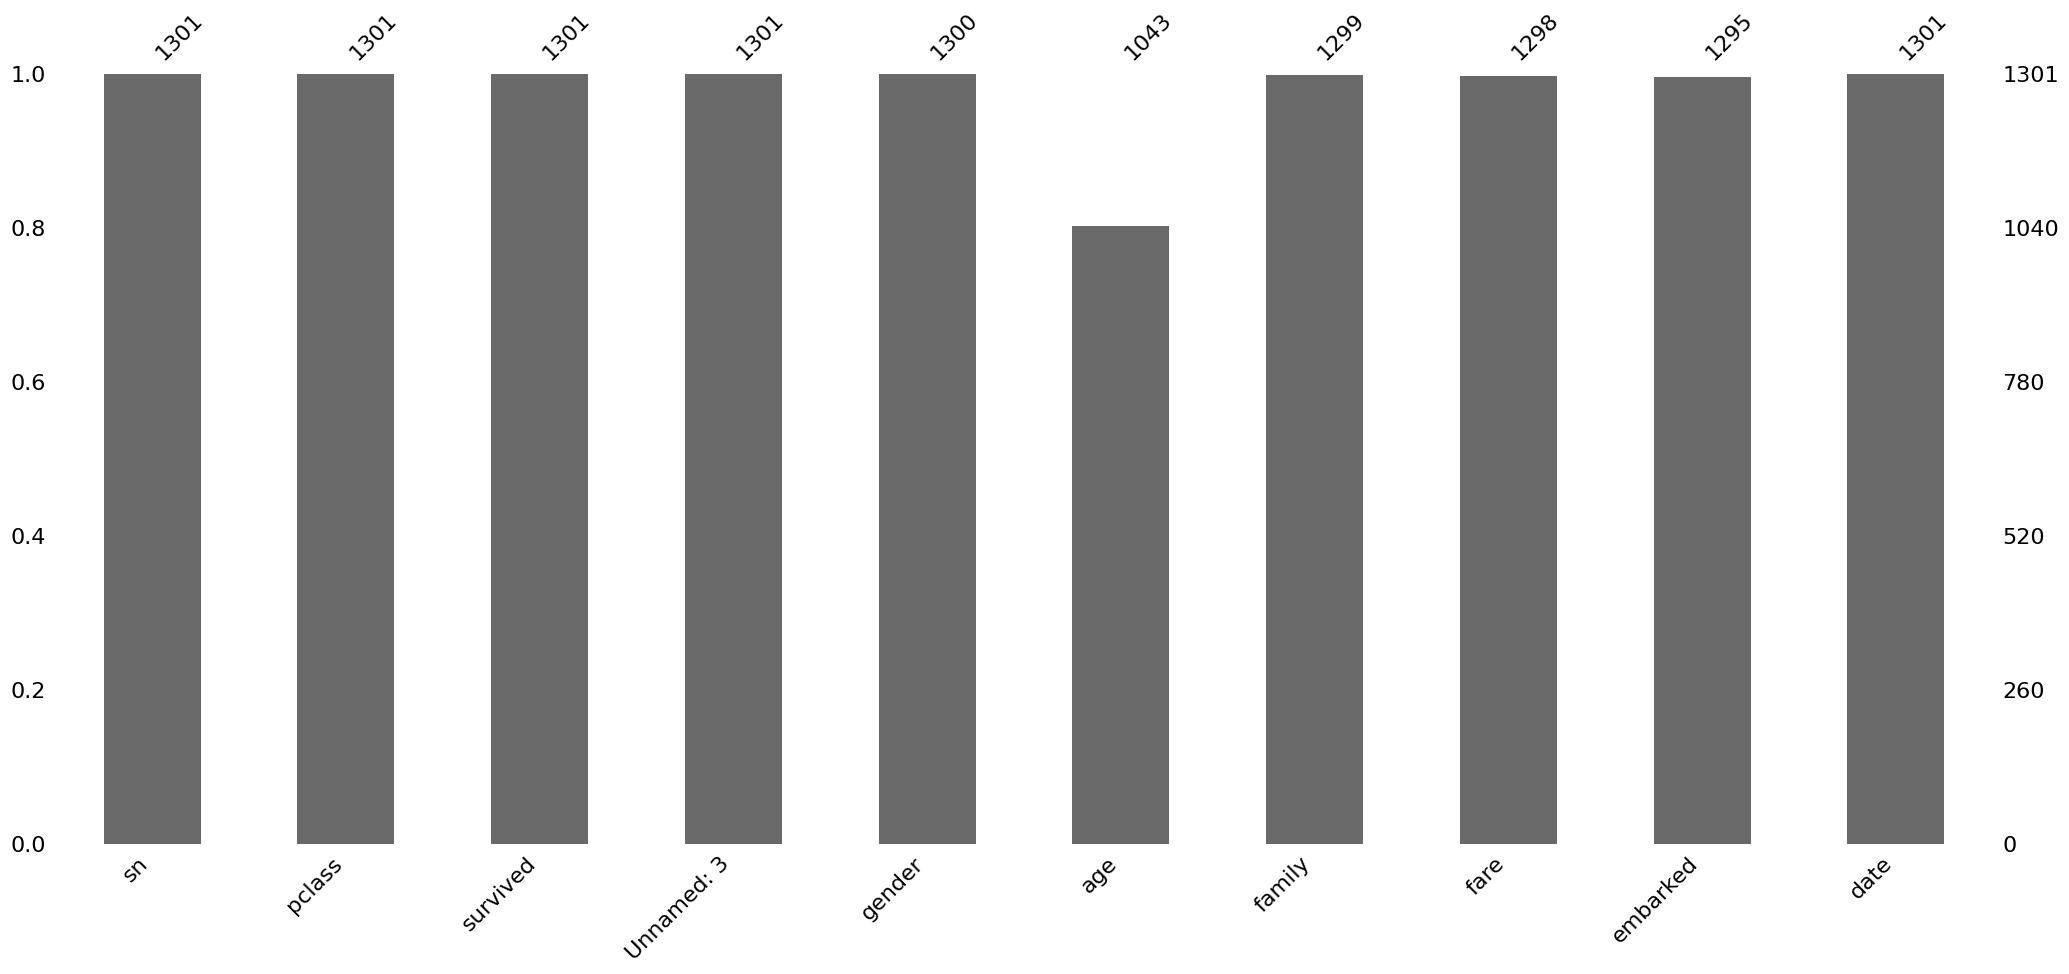

In [ ]:
msno.bar(df)

<Axes: >

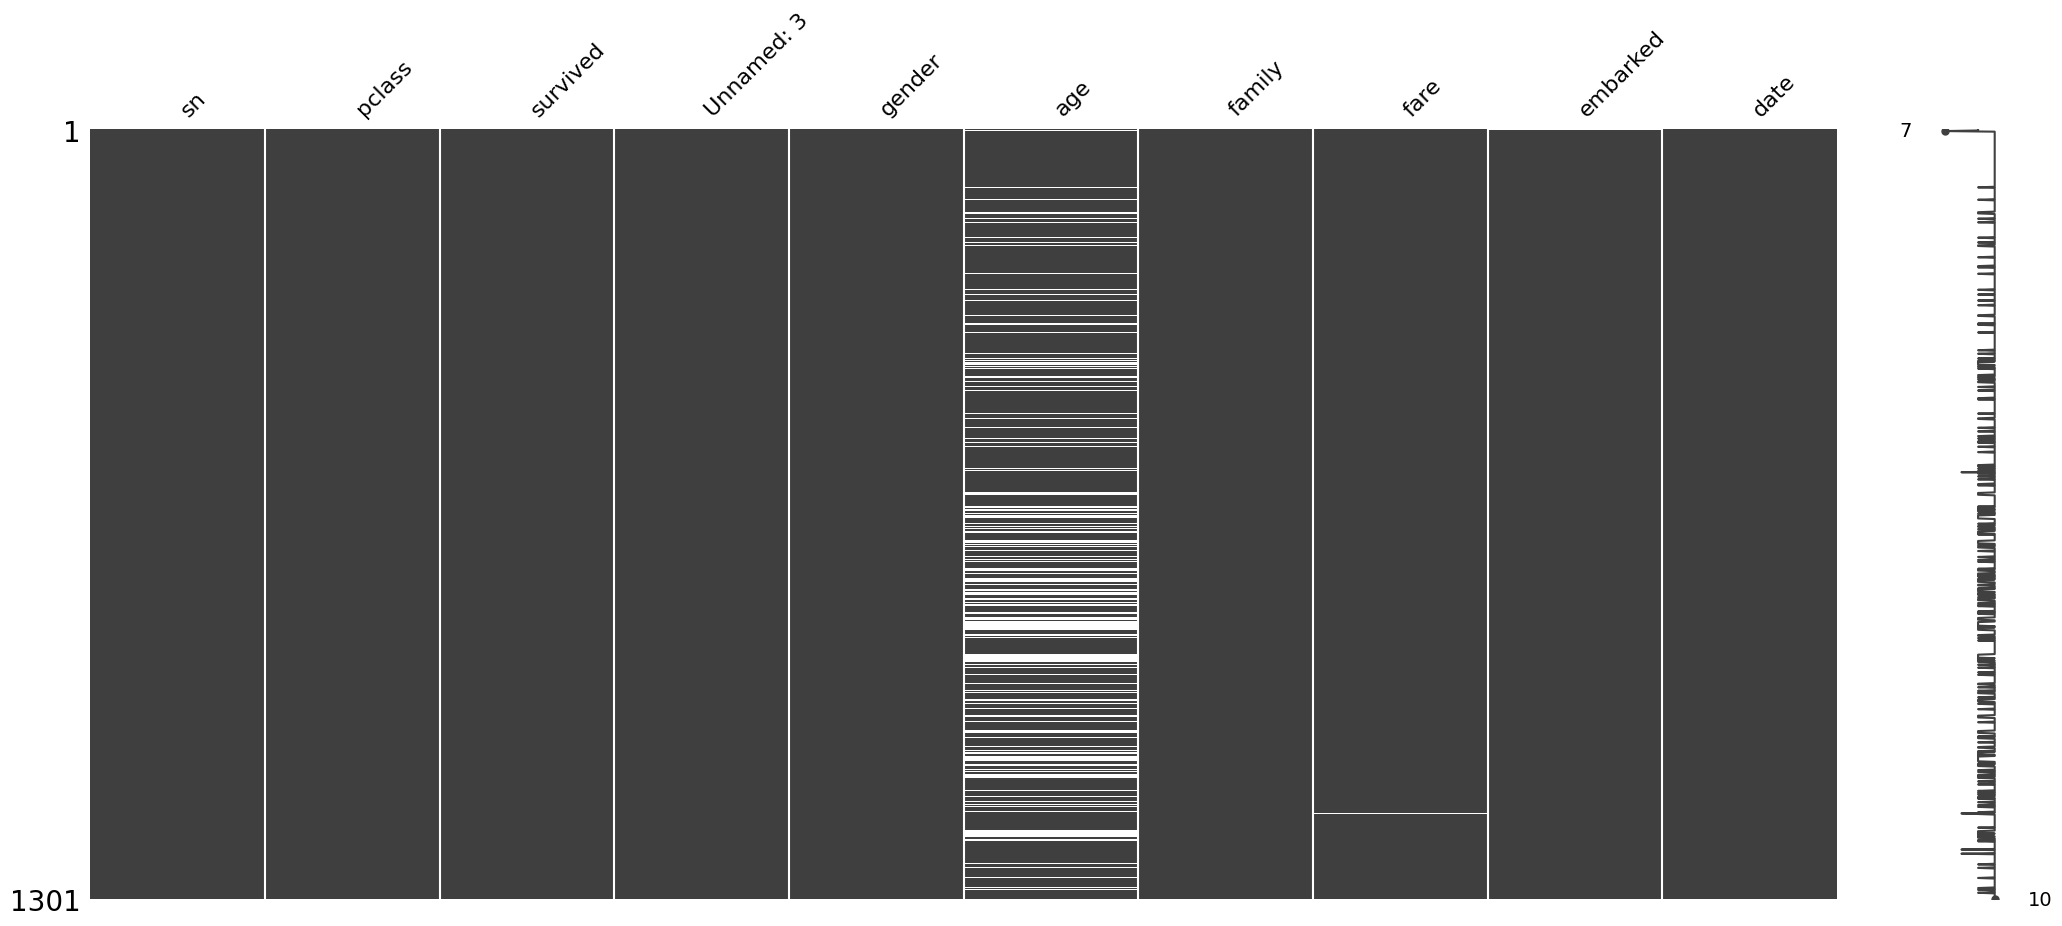

In [ ]:
msno.matrix(df)

<Axes: >

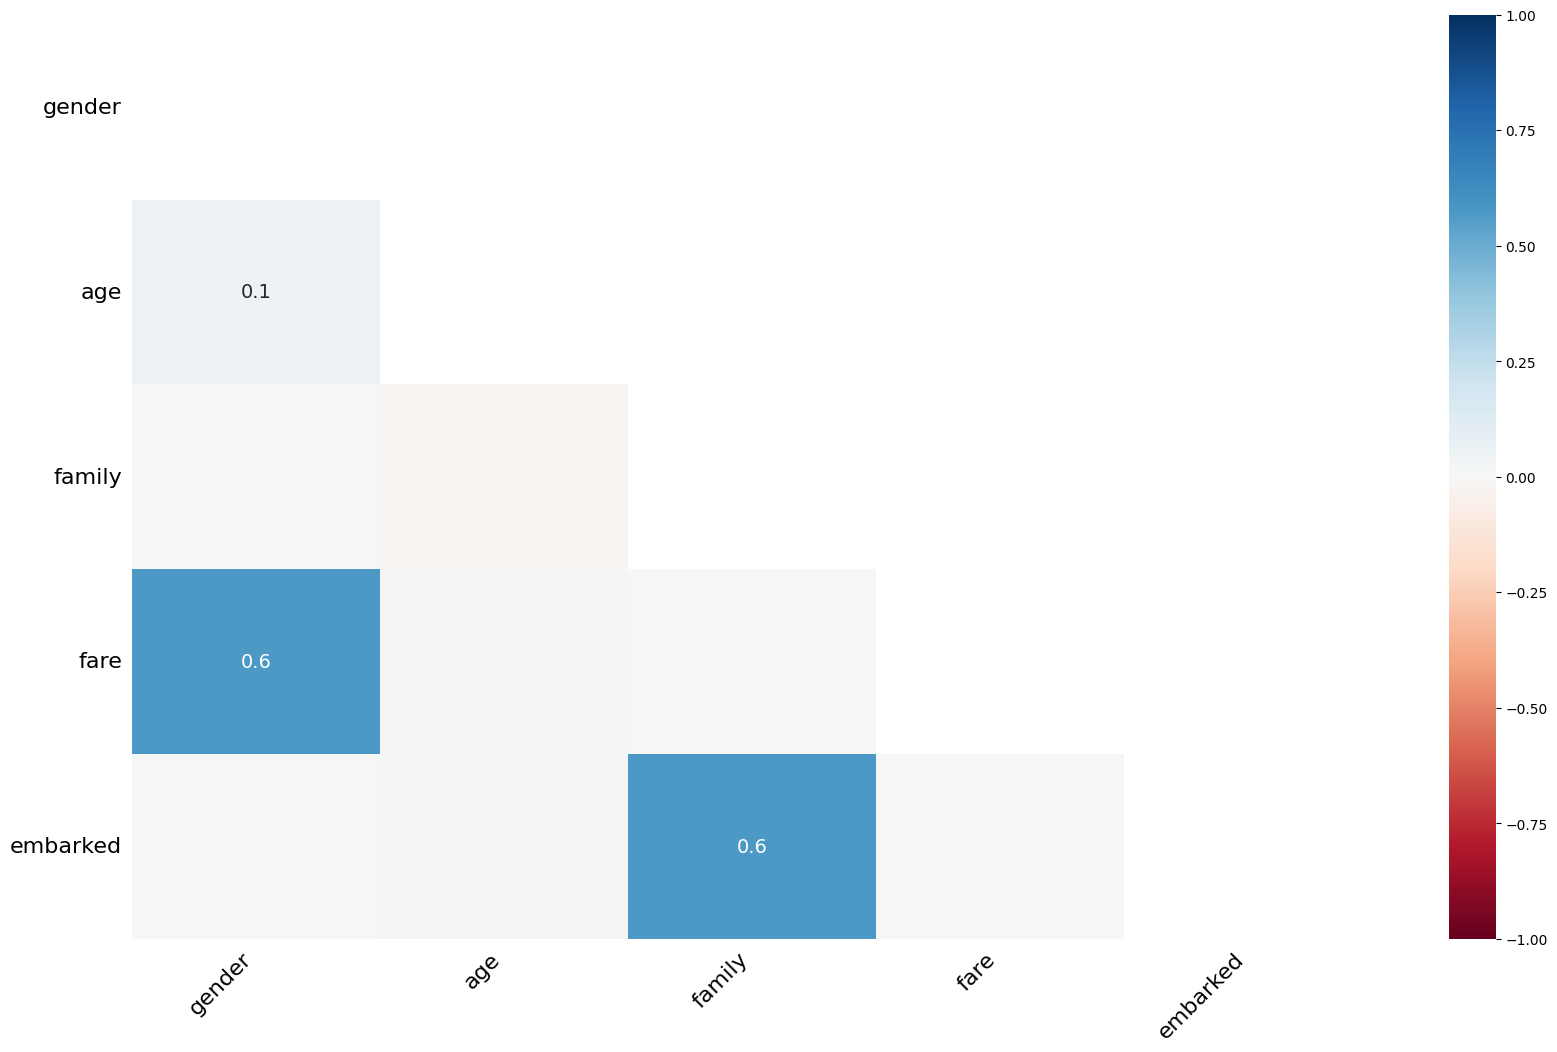

In [ ]:
msno.heatmap(df)

<Axes: >

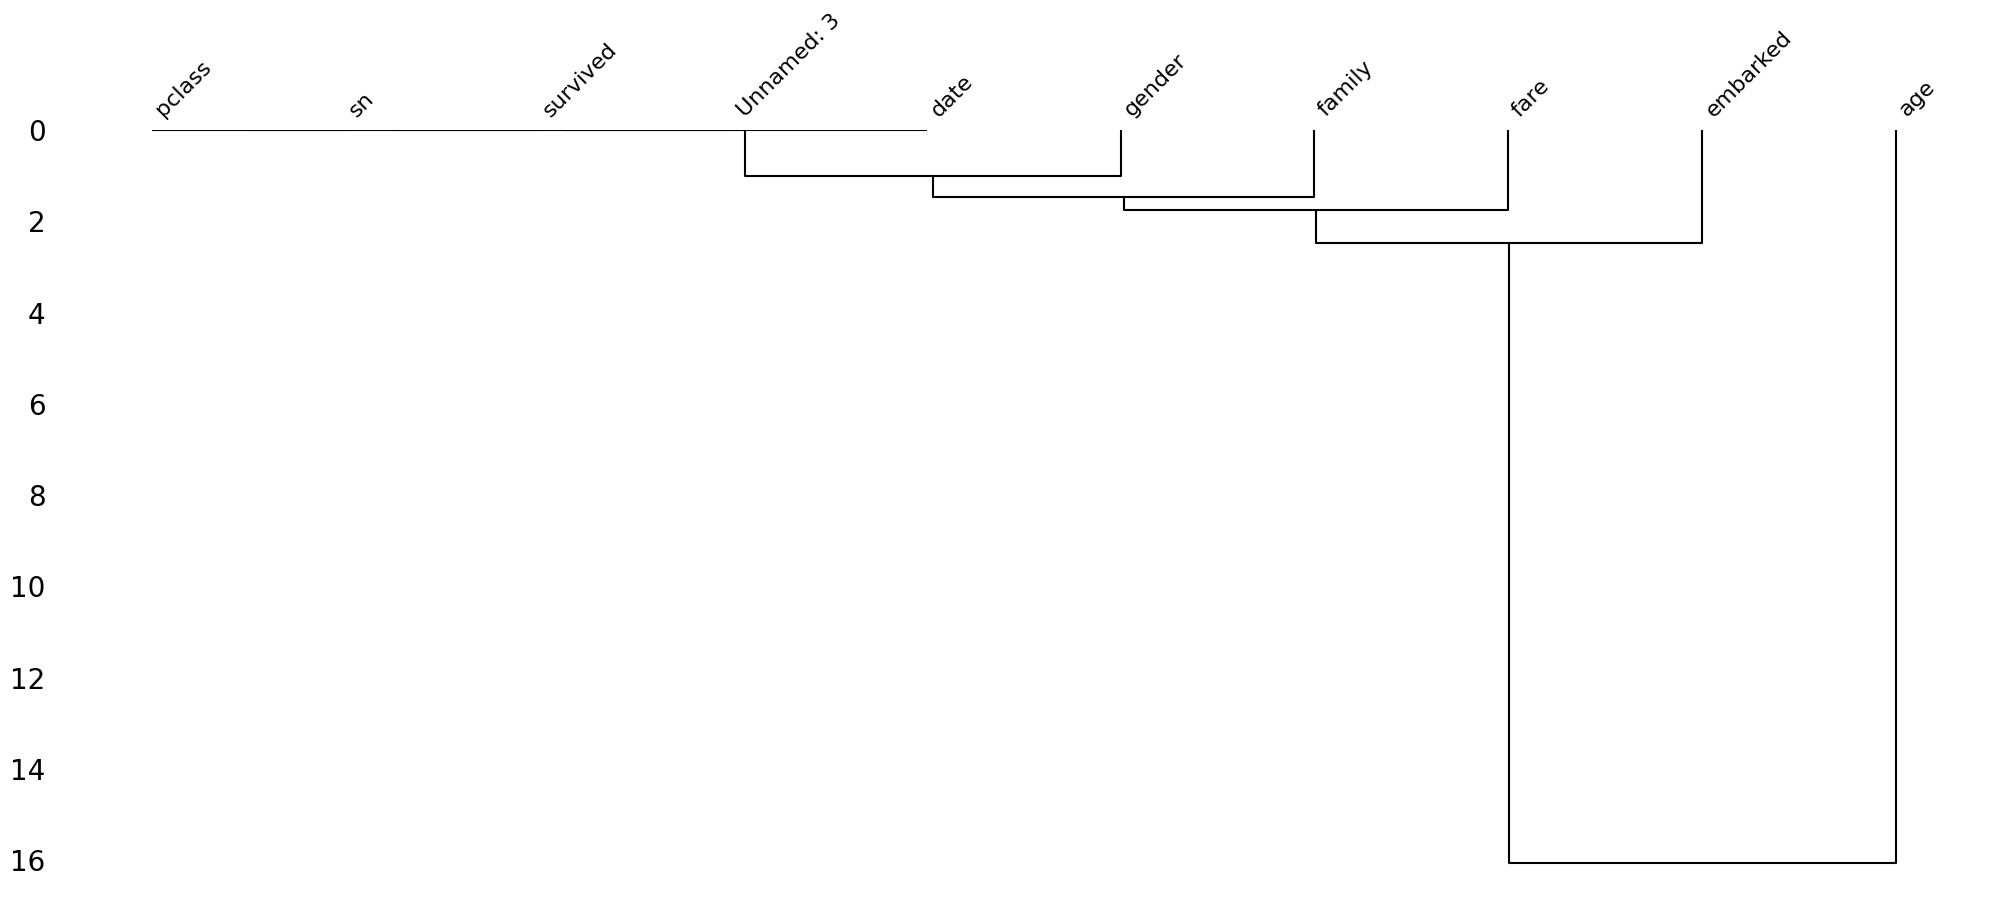

In [ ]:
msno.dendrogram(df)

# **Encoding**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Insurance%20Premium.csv')

In [ ]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


In [ ]:
df.isnull().sum()

ID          0
Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Premium     0
dtype: int64

In [ ]:
df.Gender.value_counts()

male      676
female    662
Name: Gender, dtype: int64

In [ ]:
df.Region.value_counts()

east     364
south    325
west     325
north    324
Name: Region, dtype: int64

In [ ]:
df.Smoker.value_counts()

no     1064
yes     274
Name: Smoker, dtype: int64

In [ ]:
{'no':0,'yes':1}

{'no': 0, 'yes': 1}

In [ ]:
df.Smoker.replace({'no':0,'yes':1}, inplace=True)

In [ ]:
df.Region.replace( { 'south':'South', 'east':'East','west':'West'},inplace=True    )

In [ ]:
df = pd.get_dummies(data = df, columns=['Gender','Region'])

In [ ]:
df

,ID,Age,BMI,Children,Smoker,Premium,Gender_female,Gender_male,Region_East,Region_South,Region_West,Region_north
0,1,19,27.900,0,1,16885,1,0,0,1,0,0
1,2,18,33.770,1,0,1726,0,1,1,0,0,0
2,3,28,33.000,3,0,4449,0,1,1,0,0,0
3,4,33,22.705,0,0,21984,0,1,0,0,1,0
4,5,32,28.880,0,0,3867,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1334,50,30.970,3,0,10601,0,1,0,0,1,0
1334,1335,18,31.920,0,0,2206,1,0,0,0,0,1
1335,1336,18,36.850,0,0,1630,1,0,1,0,0,0
1336,1337,21,25.800,0,0,2008,1,0,0,1,0,0


In [ ]:
True + 1

2

In [ ]:
True == 1

True

# **Feature Scaling**

In [ ]:
# step 1: library import
import pandas as pd

In [ ]:
# step 2: dataset read
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Insurance%20Premium.csv')

In [ ]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
ss = StandardScaler()
mms = MinMaxScaler()

In [ ]:
df[['Agess','BMIss']] = ss.fit_transform(df[['Age','BMI']])

In [ ]:
df[['Agemms','BMImms']] = mms.fit_transform(df[['Age','BMI']])

In [ ]:
df.describe()

,ID,Age,BMI,Children,Smoker,Premium,Gender_female,Gender_male,Region_East,Region_South,Region_West,Region_north,Agess,BMIss,Agemms,BMImms
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,0.204783,13270.414798,0.494768,0.505232,0.272048,0.242900,0.242900,0.242152,-1.805565e-16,-2.124194e-16,0.461022,0.395572
std,386.391641,14.049960,6.098187,1.205493,0.403694,12110.012882,0.500160,0.500160,0.445181,0.428995,0.428995,0.428546,1.000374e+00,1.000374e+00,0.305434,0.164062
min,1.000000,18.000000,15.960000,0.000000,0.000000,1122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.509965e+00,-2.412011e+00,0.000000,0.000000
25%,335.250000,27.000000,26.296250,0.000000,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.691547e-01,-7.164063e-01,0.195652,0.278080
50%,669.500000,39.000000,30.400000,1.000000,0.000000,9382.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.474046e-02,-4.320880e-02,0.456522,0.388485
75%,1003.750000,51.000000,34.693750,2.000000,0.000000,16640.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.396738e-01,6.611572e-01,0.717391,0.504002
max,1338.000000,64.000000,53.130000,5.000000,1.000000,63770.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.765289e+00,3.685522e+00,1.000000,1.000000


In [ ]:
# step : define X and y
X = df[['Age', 'BMI']]
y = df['Premium']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, y_test = train_test_split(X,y,random_state=2529)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)

StandardScaler()

In [ ]:
X_trainss = ss.transform(X_train)

In [ ]:
X_testss = ss.transform(X_test)

# **Linear Regression**

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')

In [ ]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
y = df['Chance of Admit ']
X = df[['GRE Score', 'TOEFL Score',
       'LOR ', 'CGPA', 'Research' ]]

In [ ]:
import statsmodels.api as sm

In [ ]:
X1 = sm.add_constant(X)

In [ ]:
print(sm.OLS(y,X1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          2.04e-136
Time:                        17:14:14   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2985      0.117    -11.070      

# **Regularized Regression**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/House%20Prices.csv')

In [ ]:
df.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [ ]:
df.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [ ]:
y = df['Price']
X = df[['Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
ss.fit(X_train)

StandardScaler()

In [ ]:
X_train= ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
lr = LinearRegression()
lasso = Lasso(alpha=100, max_iter=5000)
ridge = Ridge(alpha=100, max_iter=5000)

In [ ]:
lr.fit(X_train,y_train)
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)

Ridge(alpha=100, max_iter=5000)

In [ ]:
lr.coef_

array([-2.92763265e+04,  2.86921645e+04,  1.63008522e+18,  6.22404398e+03,
        6.45244721e+03,  5.57601780e+04,  3.82630341e+04,  1.63997453e+04,
        1.13050506e+05, -1.46945612e+18, -7.79862015e+17, -7.77727851e+04,
        8.73116406e+03, -3.10093344e+04,  8.25647347e+04, -2.96386454e+04,
        1.56842264e+04, -1.04757008e+04])

In [ ]:
lasso.coef_

array([-29805.73008385,  28328.2804978 , 136522.41384354,   5829.21141659,
         6235.6850084 ,  55556.58547963,  38587.47392192,  16371.46240513,
       113043.90333017,  25003.9039254 ,      0.        , -77179.23003568,
         8677.19697109, -30393.2228077 ,  82627.95977623, -28978.8739947 ,
        15489.35168706,  -9902.55903019])

In [ ]:
ridge.coef_

array([-29428.96895319,  28445.54240371,  80220.32733725,   6129.62986364,
         6511.92470432,  55346.71846058,  38649.05556538,  16610.97042027,
       111634.57360054,  74821.46046598,  26695.89818235, -76202.36984569,
         8995.66165071, -29974.29923069,  82352.60023179, -29062.7471083 ,
        16794.99443327, -10063.24190936])

# **Logistic Regression**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# import library
import pandas as pd

# dataset
df =pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')

y = df['diabetes']
X = df.drop(['diabetes'],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(lr.predict_proba(X_test.values[[0]]))

              precision    recall  f1-score   support

           0       0.77      0.92      0.83       118
           1       0.80      0.55      0.66        74

    accuracy                           0.78       192
   macro avg       0.78      0.73      0.74       192
weighted avg       0.78      0.78      0.77       192

[[0.92418069 0.07581931]]


In [ ]:
lr.predict(X_test.values[[0]])

array([0])

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# import library
import pandas as pd

# dataset
df =pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/IRIS.csv')

y = df['species']
X = df.drop(['species'],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(model.predict_proba(X_test.values[[0]]))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.97        38
      macro avg       0.95      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[9.14119526e-01 8.58768039e-02 3.67036251e-06]]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# import library
import pandas as pd
import statsmodels.api as sm

# dataset
df =pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')

y = df['diabetes']
X = df.drop(['diabetes'],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

print(sm.Logit(y_train,X_train).fit().summary())


Optimization terminated successfully.
         Current function value: 0.594474
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                 0.06953
Time:                        16:28:10   Log-Likelihood:                -342.42
converged:                       True   LL-Null:                       -368.00
Covariance Type:            nonrobust   LLR p-value:                 8.499e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
pregnancies     0.1150      0.033      3.522      0.000       0.051       0.179
glucose         0.0129    

# **Undertanding ModelPipeline and Download Model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo

In [ ]:
adult = fetch_ucirepo(id=2)

In [ ]:
X = adult.data.features
y = adult.data.targets

In [ ]:
X.shape, y.shape

((48842, 14), (48842, 1))

In [ ]:
X = X.drop(['native-country'],axis=1)

In [ ]:
X.shape

(48842, 13)

In [ ]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [ ]:
y.replace({'<=50K':0,'<=50K.':0,'>50K':1,'>50K.':1},inplace=True )

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.8+ MB


In [ ]:
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [ ]:
X.dropna(inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [ ]:
categorical_cols = X.select_dtypes(include=['object','bool']).columns

In [ ]:
numerical_cols = X.select_dtypes(include=['int64','float64']).columns

In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
ss = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num',ss,numerical_cols),('cat',ohe,categorical_cols)])

In [ ]:
('mean_miss',si,numerical_cols), ('mode_miss',sa,cate)

In [ ]:
model = Pipeline(steps= [('data_prep', preprocessor),('binary_class', LogisticRegression())])

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('data_prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object'))])),
                ('binary_class', LogisticRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8506264843174187

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9303
           1       0.73      0.59      0.65      2908

    accuracy                           0.85     12211
   macro avg       0.80      0.76      0.78     12211
weighted avg       0.84      0.85      0.84     12211



In [ ]:
import joblib

In [ ]:
joblib.dump(model,'adult_classifier.pkl')

['adult_classifier.pkl']

In [ ]:
my_model = joblib.load('adult_classifier.pkl')

In [ ]:
my_model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

# **Ensemble Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
iris= load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## **Voting**

In [ ]:
# Voting Classifier
estimators = [ ('rf', rfc) ,('ab', ada) , ('gb', gbc)]


In [ ]:
vc = VotingClassifier(estimators = estimators, voting = 'soft')

In [ ]:
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        19

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## **Stacking**

In [ ]:
base_model = [ ('rf', rfc) ,('ab', ada) , ('gb', gbc)]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
meta_model = LogisticRegression()

In [ ]:
sc = StackingClassifier(estimators=base_model, final_estimator=meta_model      )

In [ ]:
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.92      0.96      0.93        38
weighted avg       0.96      0.95      0.95        38



The AdaBoost (Adaptive Boosting) algorithm is a popular ensemble method used for building a strong classifier as the weighted sum of weak classifiers. It focuses on correctly classifying the training examples that were misclassified by previous classifiers. Here’s a detailed breakdown of AdaBoost:

### Working of AdaBoost Algorithm

1. **Initialization**: Each data instance in the training set is initially assigned an equal weight.
2. **Iterative Training**:
   - A weak classifier (typically a decision stump) is trained on the weighted training data.
   - The error rate of the classifier is calculated based on these weights.
   - The classifier is assigned a performance weight (alpha), which is dependent on its error rate. More accurate classifiers are given more weight.
   - Update the weights of the training instances: increase the weights of misclassified instances so that they are more likely to be picked up in the subsequent round of training.
   - Normalize the weights so that they sum up to 1.
3. **Final Model**: This process is repeated for a specified number of rounds or until perfect accuracy is achieved. The final model is a weighted sum of these weak classifiers.

### Mathematical Formula

For each classifier \(i\):

- Let \(D_i\) be the distribution of weights over the training data at iteration \(i\).
- Error \( \epsilon_i = \frac{\sum_{y_i \neq h_i(x_i)} D_i(i)}{\sum_i D_i(i)} \)
- Performance weight \( \alpha_i = \frac{1}{2} \log \left(\frac{1 - \epsilon_i}{\epsilon_i}\right) \)
- Update weights: \( D_{i+1}(i) = \frac{D_i(i) \exp(-\alpha_i y_i h_i(x_i))}{Z_i} \) where \(Z_i\) is a normalization constant.

### Assumptions

- Binary classification problem.
- Errors are due to misclassification noise rather than outliers.
- Weak learners should perform better than random guessing.

### Data Pre-processing Required

- Handle missing values as AdaBoost is sensitive to them.
- Data scaling is not required as AdaBoost is not sensitive to the magnitude of features.
- Convert categorical variables into numerical.

### Implementation Steps

1. Initialize weights \(D_1(i) = \frac{1}{N}\) for all data points.
2. For \( t = 1 \) to \( T \):
   - Fit a classifier \( h_t(x) \) to the training data using weights \( D_t \).
   - Calculate error \( \epsilon_t \) and performance weight \( \alpha_t \).
   - Update the weights \( D_{t+1} \).
   - Normalize \( D_{t+1} \).
3. Output the final model \( H(x) = \text{sign}(\sum_{t=1}^T \alpha_t h_t(x)) \).

### Limitations and Disadvantages

- Sensitive to noisy data and outliers.
- Vulnerable to overfitting if the number of iterations is too high.

### Advantages

- Simple to implement.
- Very effective with weak classifiers.
- Automatically adjusts weights.

### Applications

- Binary classification problems across various fields including finance, healthcare, and image recognition.

### Hyperparameters

- Number of iterations \( T \).
- Choice of the weak learner (e.g., decision tree depth).
- Learning rate (sometimes used to shrink the weights \( \alpha \)).

### Simple Python Code Example

Here's a basic example using Python's Scikit-learn library:

```python
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create adaboost model
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
```

This code demonstrates setting up AdaBoost for a classification task, fitting it to the training data, and evaluating its performance.

XGBoost (eXtreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting that has become popular for structured or tabular data. Below is an extensive overview of the XGBoost algorithm:

### Working of XGBoost Algorithm

XGBoost enhances the standard gradient boosting framework through systems optimizations and algorithmic enhancements:

1. **Objective Function**: The objective function in XGBoost includes both the loss function and a regularization term. The loss function ensures the model fits the data well, while the regularization term helps control the model's complexity, thus preventing overfitting.
2. **Gradient and Hessian**: XGBoost uses a second-order Taylor series approximation to expand the loss function about the predictions, utilizing both the gradient and the Hessian for faster convergence.
3. **Tree Ensemble Model**: It builds an ensemble of decision trees in a sequential manner. Each tree corrects the errors of its predecessors.
4. **Pruning**: Unlike traditional gradient boosting, which stops splitting a node when it encounters a negative loss reduction, XGBoost grows a full tree up to a specified max depth and then prunes back the branches that have a negative gain.
5. **Regularization**: Incorporates both L1 (Lasso regression) and L2 (Ridge regression) regularization to control over-fitting.

### Mathematical Formula

The objective function that XGBoost optimizes is given by:
\[ \text{Obj} = \sum_{i=1}^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k) \]
where \( l \) is a differentiable convex loss function that measures the difference between the prediction \( \hat{y}_i \) and the target \( y_i \), and \( \Omega \) represents the regularization term:
\[ \Omega(f) = \gamma T + \frac{1}{2} \lambda \|w\|^2 \]
Here, \( T \) is the number of terminal nodes in the trees, \( w \) are the leaf weights, \( \gamma \) and \( \lambda \) are regularization parameters.

### Assumptions

- Assumes the target function is an additive function of the predictors.
- The data features should have some predictive power.

### Data Pre-processing Required

- Handle missing values (XGBoost can handle missing values internally).
- Feature encoding (categorical variables should be converted into numerical).
- Feature scaling is not necessary as tree methods are scale invariant.

### Implementation Steps

1. Define the objective function including both the loss and the regularization term.
2. Compute gradients and Hessians based on the loss function.
3. For each iteration, fit a new model to the negative gradients.
4. Update the model using a shrinkage parameter (learning rate).
5. Repeat until convergence or the maximum number of iterations is reached.

### Limitations and Disadvantages

- Computationally intensive, especially with large datasets.
- Can overfit if hyperparameters are not tuned properly.
- Requires careful tuning of parameters.

### Advantages

- High performance and fast execution.
- Handles a variety of data types, relationships, distributions, and various types of prediction problems.
- Built-in handling of missing data.
- Effective with large datasets.

### Applications

- Widely used in winning solutions of data science competitions like those on Kaggle.
- Suitable for a range of predictive tasks such as classification, regression, and ranking across diverse industries.

### Hyperparameters

- `max_depth`: Maximum depth of a tree.
- `eta`: Learning rate.
- `gamma`: Minimum loss reduction required for a split to occur.
- `lambda`: L2 regularization term on weights.
- `alpha`: L1 regularization term on weights.
- `subsample`: Subsample ratio of the training instances.
- `colsample_bytree`: Subsample ratio of columns when constructing each tree.

### Simple Python Code Example

Here's how to use XGBoost in Python:

```python
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set
preds = xg_reg.predict(X_test)

# Compute the rmse
rmse

# **🧪TEST**

- Four problems on MNIST,Fashion MNIST, CIFAR-10, CIFAR-100
- **Marks 25*4 = 100**
- Use Ensemble models (bagging, boosting, voting, stacking) - 10 marks
- Use GridSearchCV - 5 marks
- Use Pipeline - 5 marks
- Explain classification report - 5 marks

# **MNIST**

In [ ]:
# MNIST

# Import library
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from skimage.io import imshow, imread

# Load data
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

# **Fashion MNIST**

In [ ]:
# Fashion MNIST

# Import library
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from skimage.io import imshow, imread

# Load data
# Load data
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

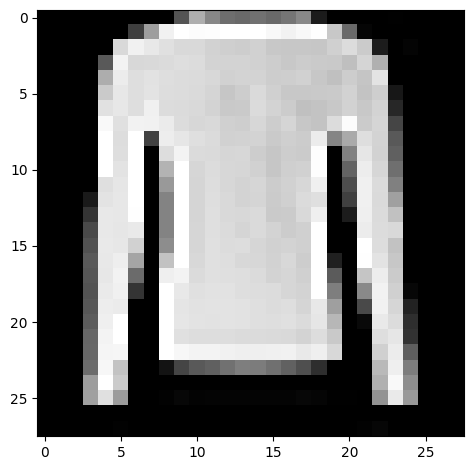

In [ ]:
imshow(X_train[1001])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000,784)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000,784)

In [ ]:
X_test.shape

In [ ]:
X_train.max(), X_train.min()

(255, 0)

In [ ]:
X_train = X_train/255

In [ ]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.24      0.36      1000
           1       0.95      0.94      0.94      1000
           2       0.51      0.61      0.56      1000
           3       0.82      0.75      0.79      1000
           4       0.44      0.52      0.48      1000
           5       0.99      0.83      0.90      1000
           6       0.28      0.42      0.34      1000
           7       0.85      0.83      0.84      1000
           8       0.93      0.89      0.91      1000
           9       0.83      0.94      0.88      1000

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.70     10000
weighted avg       0.73      0.70      0.70     10000



In [ ]:
rfc.score(X_train,y_train)

1.0

In [ ]:
rfc.score(X_test,y_test)

0.6977

# **CIFAR-10**

In [ ]:
# CIFAR 10

# Import library
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from skimage.io import imshow, imread

# Load data
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

# **CIFAR 100**

In [ ]:
# CIFAR 100

# Import library
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from skimage.io import imshow, imread

# Load data
from tensorflow.keras.datasets import cifar100
(X_train,y_train),(X_test,y_test)=cifar100.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

# **Pre-processing, Hyper parameter Tuning and Pipe Line**

In [ ]:
# import library
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MessyDataPipeline.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,NaN,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,NaN,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            9776 non-null   object 
 5   Age               9939 non-null   float64
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  9989 non-null   float64
 12  Churn             10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,9939.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9989.000000,10000.000000
mean,1.569094e+07,650.528800,38.927860,5.012800,76485.889288,1.530200,0.70550,0.515100,100078.076736,0.203700
std,7.193619e+04,96.653299,10.519497,2.892174,62397.405202,0.581654,0.45584,0.499797,57540.973779,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50911.410000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100127.710000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149402.590000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
X = df.drop(['CustomerId', 'Surname','Churn'],axis=1)
y = df['Churn']

In [ ]:
for i in X.select_dtypes(include=['object','bool']).columns:
  print(X[i].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5233
Female    4543
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=2529)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary'],
      dtype='object')

In [ ]:
y = LabelEncoder().fit_transform(y)

In [ ]:
('si_mean', SimpleImputer(strategy='mean'),['Age'])
('si_median',SimpleImputer(strategy='median'),['Estimated Salary'])
('si_mode', SimpleImputer(strategy='most_frequent'),['Gender'])
('ohe',OneHotEncoder(),['Geography','Gender'])
('ss', StandardScaler(),['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products','Estimated Salary'])
remainder='passthrough'

In [ ]:
ct1 = ColumnTransformer([('si_mean', SimpleImputer(strategy='mean'),['Age']),
('si_median',SimpleImputer(strategy='median'),['Estimated Salary']),
('si_mode', SimpleImputer(strategy='most_frequent'),['Gender'])],
remainder='drop')

In [ ]:
pd.DataFrame(ct1.fit_transform(X)).describe()

,0,1,2
count,10000.0,10000.00,10000
unique,71.0,9988.00,2
top,35.0,100127.71,Male
freq,474.0,12.00,5457


In [ ]:
ct2 = ColumnTransformer([('ohe',OneHotEncoder(),['Geography','Gender']),
('ss', StandardScaler(),['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products','Estimated Salary'])],
remainder='drop')

In [ ]:
pd.DataFrame(ct2.fit_transform(X)).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,9.939000e+03,1.000000e+04,1.000000e+04,1.000000e+04,9.989000e+03
mean,0.501400,0.250900,0.247700,0.454300,0.523300,0.022400,-4.860112e-16,-1.251081e-16,-1.090683e-16,-6.075140e-17,1.634248e-17,6.828722e-17
std,0.500023,0.433553,0.431698,0.497932,0.499482,0.147988,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.109504e+00,-1.989535e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.739135e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.883586e-01,-6.586064e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-8.545064e-01
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.522218e-02,-1.832746e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,8.626157e-04
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,6.981094e-01,4.821899e-01,6.871299e-01,8.199205e-01,8.077366e-01,8.572497e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.063884e+00,5.045375e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.736491e+00


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline(steps= [('col_trans', ct),('classifier', RandomForestClassifier())])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'col_trans__si_mean__strategy':['mean','median'],
         'classifier__criterion' : ['gini','entropy']}

In [ ]:
grid_model = GridSearchCV(pipeline, param_grid, cv=5)

In [ ]:
grid_model.fit(X_train,y_train)

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: 'Male'

--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: 'Female'


In [ ]:
from sklearn.metrics import accuracy_score, classification_report